# Data Cleaning

# I. Imports and Observing Data

In [621]:
#sourced from kaggle competition  https://www.kaggle.com/c/dsir-907-project-2/data

###### Import relevant libraries

In [622]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import seaborn as sns 
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config


##### Read in data sets

In [623]:
ames_train=pd.read_csv('../datasets/train.csv')
ames_test=pd.read_csv('../datasets/test.csv')

In [624]:
#I made columns all lowercase so they are easier to work with.
ames_train.columns = ames_train.columns.str.lower().str.replace(' ', '_')
ames_test.columns = ames_test.columns.str.lower().str.replace(' ', '_')

In [625]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [626]:
ames_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [627]:
#checked correlated variables to salesprice
ames_train.corr()[['saleprice']].sort_values(by="saleprice",ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.650270
garage_cars,0.648220
total_bsmt_sf,0.628925
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969


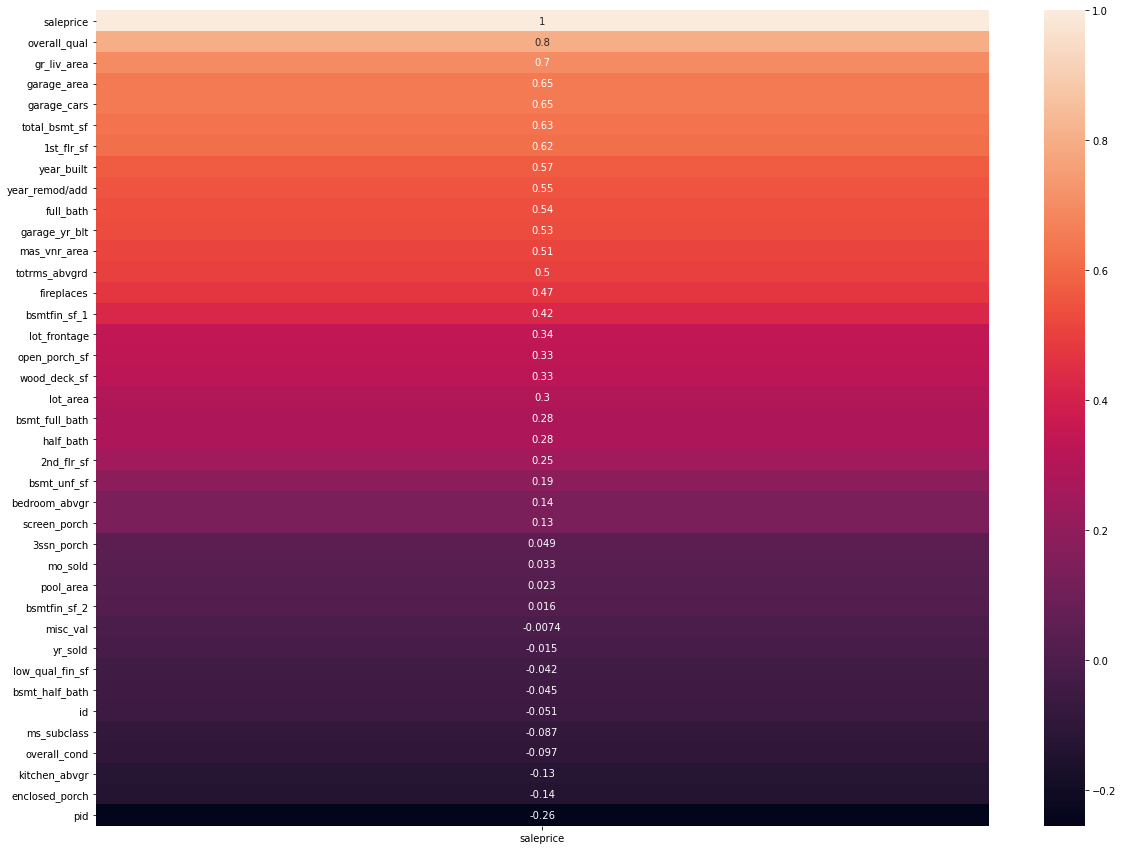

In [628]:
#check what variables correlate with Sale price in ames_train
plt.figure(figsize=(20,15))
sns.heatmap(ames_train.corr()[['saleprice']].sort_values(by="saleprice",ascending=False), annot=True);


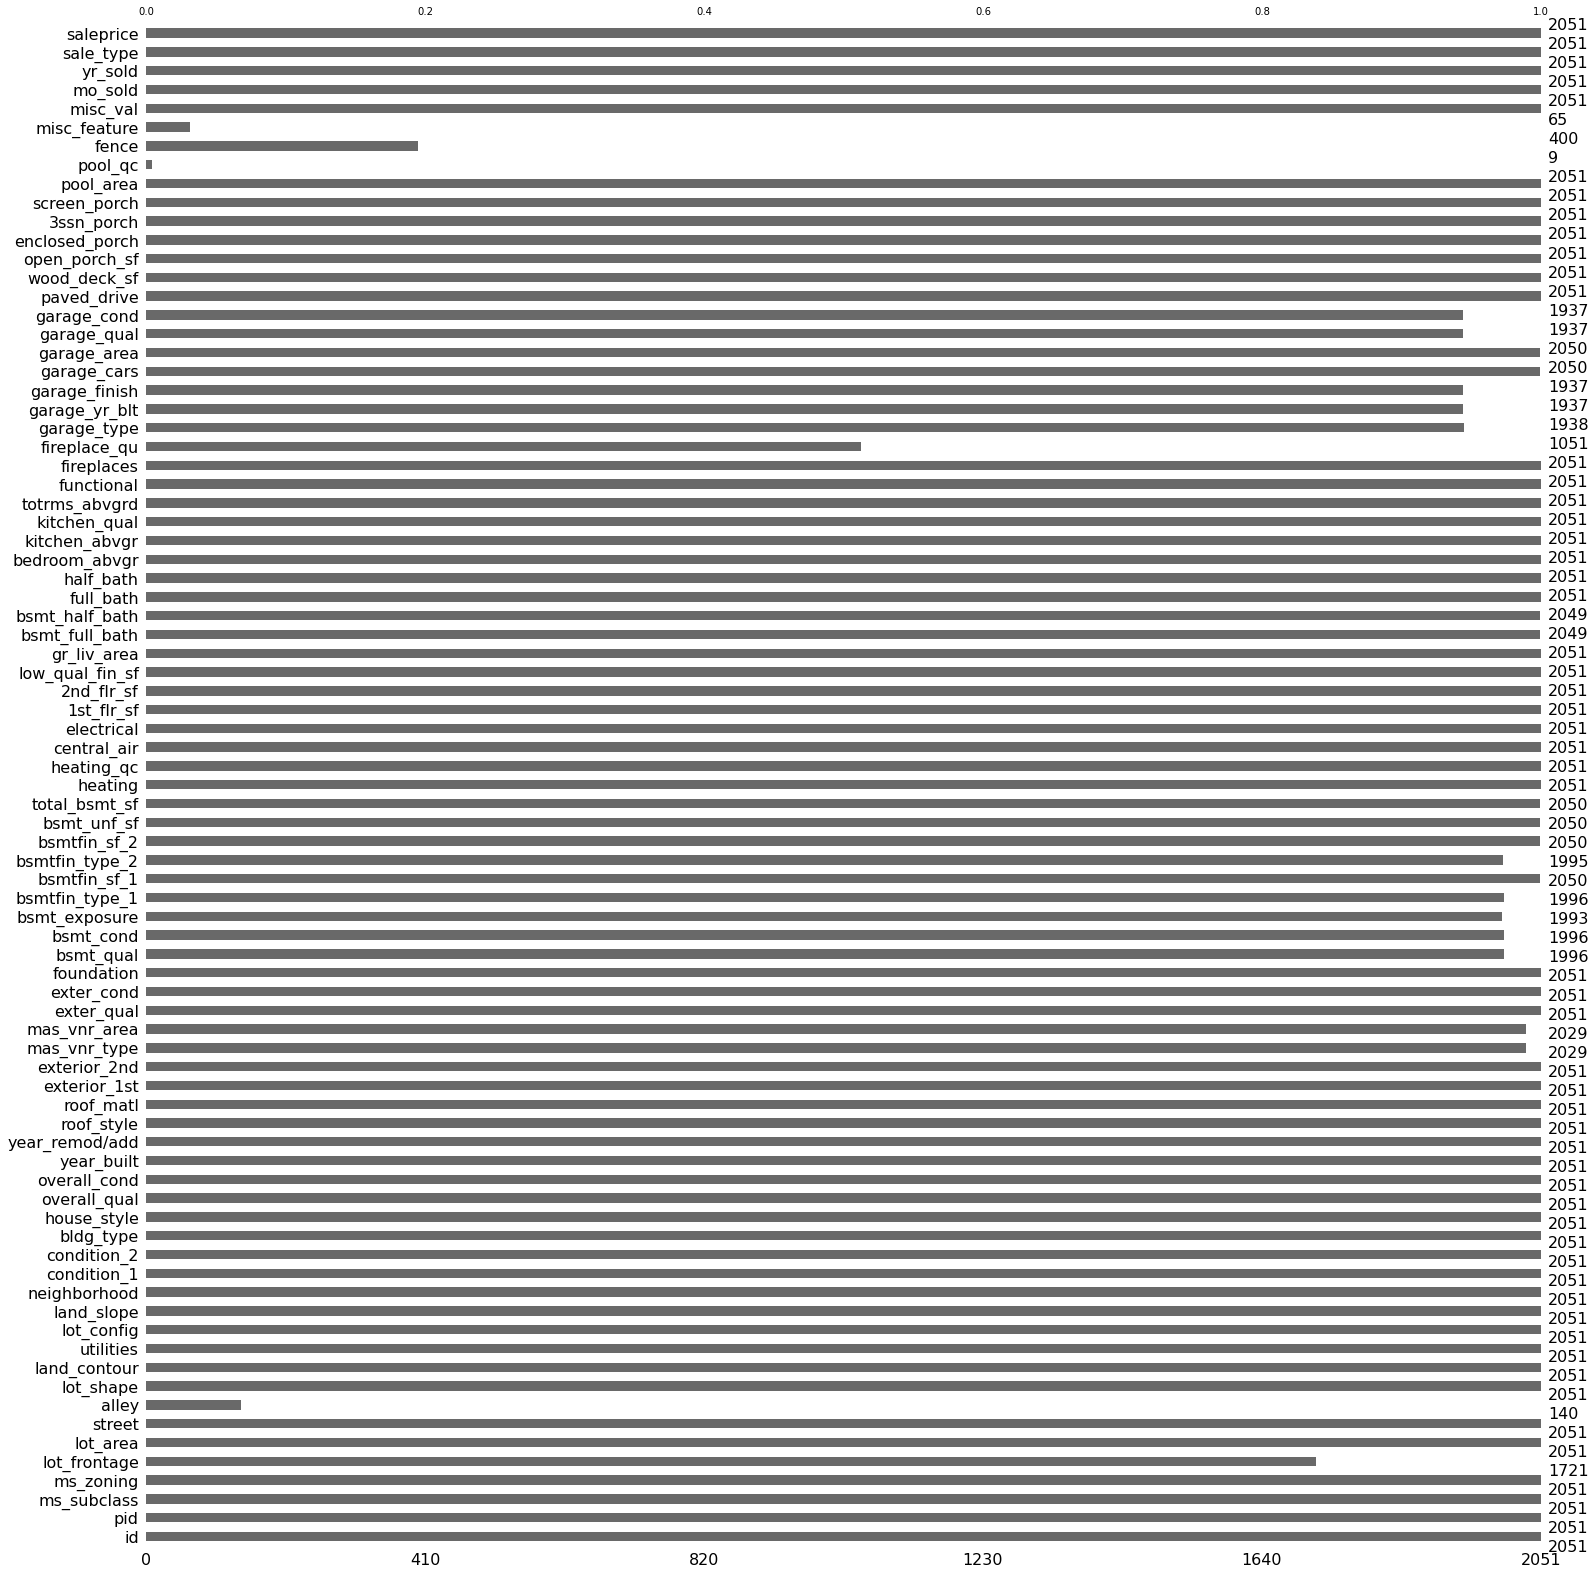

In [629]:
#check missing/Nan values in Dataset train.csv
msno.bar(ames_train);

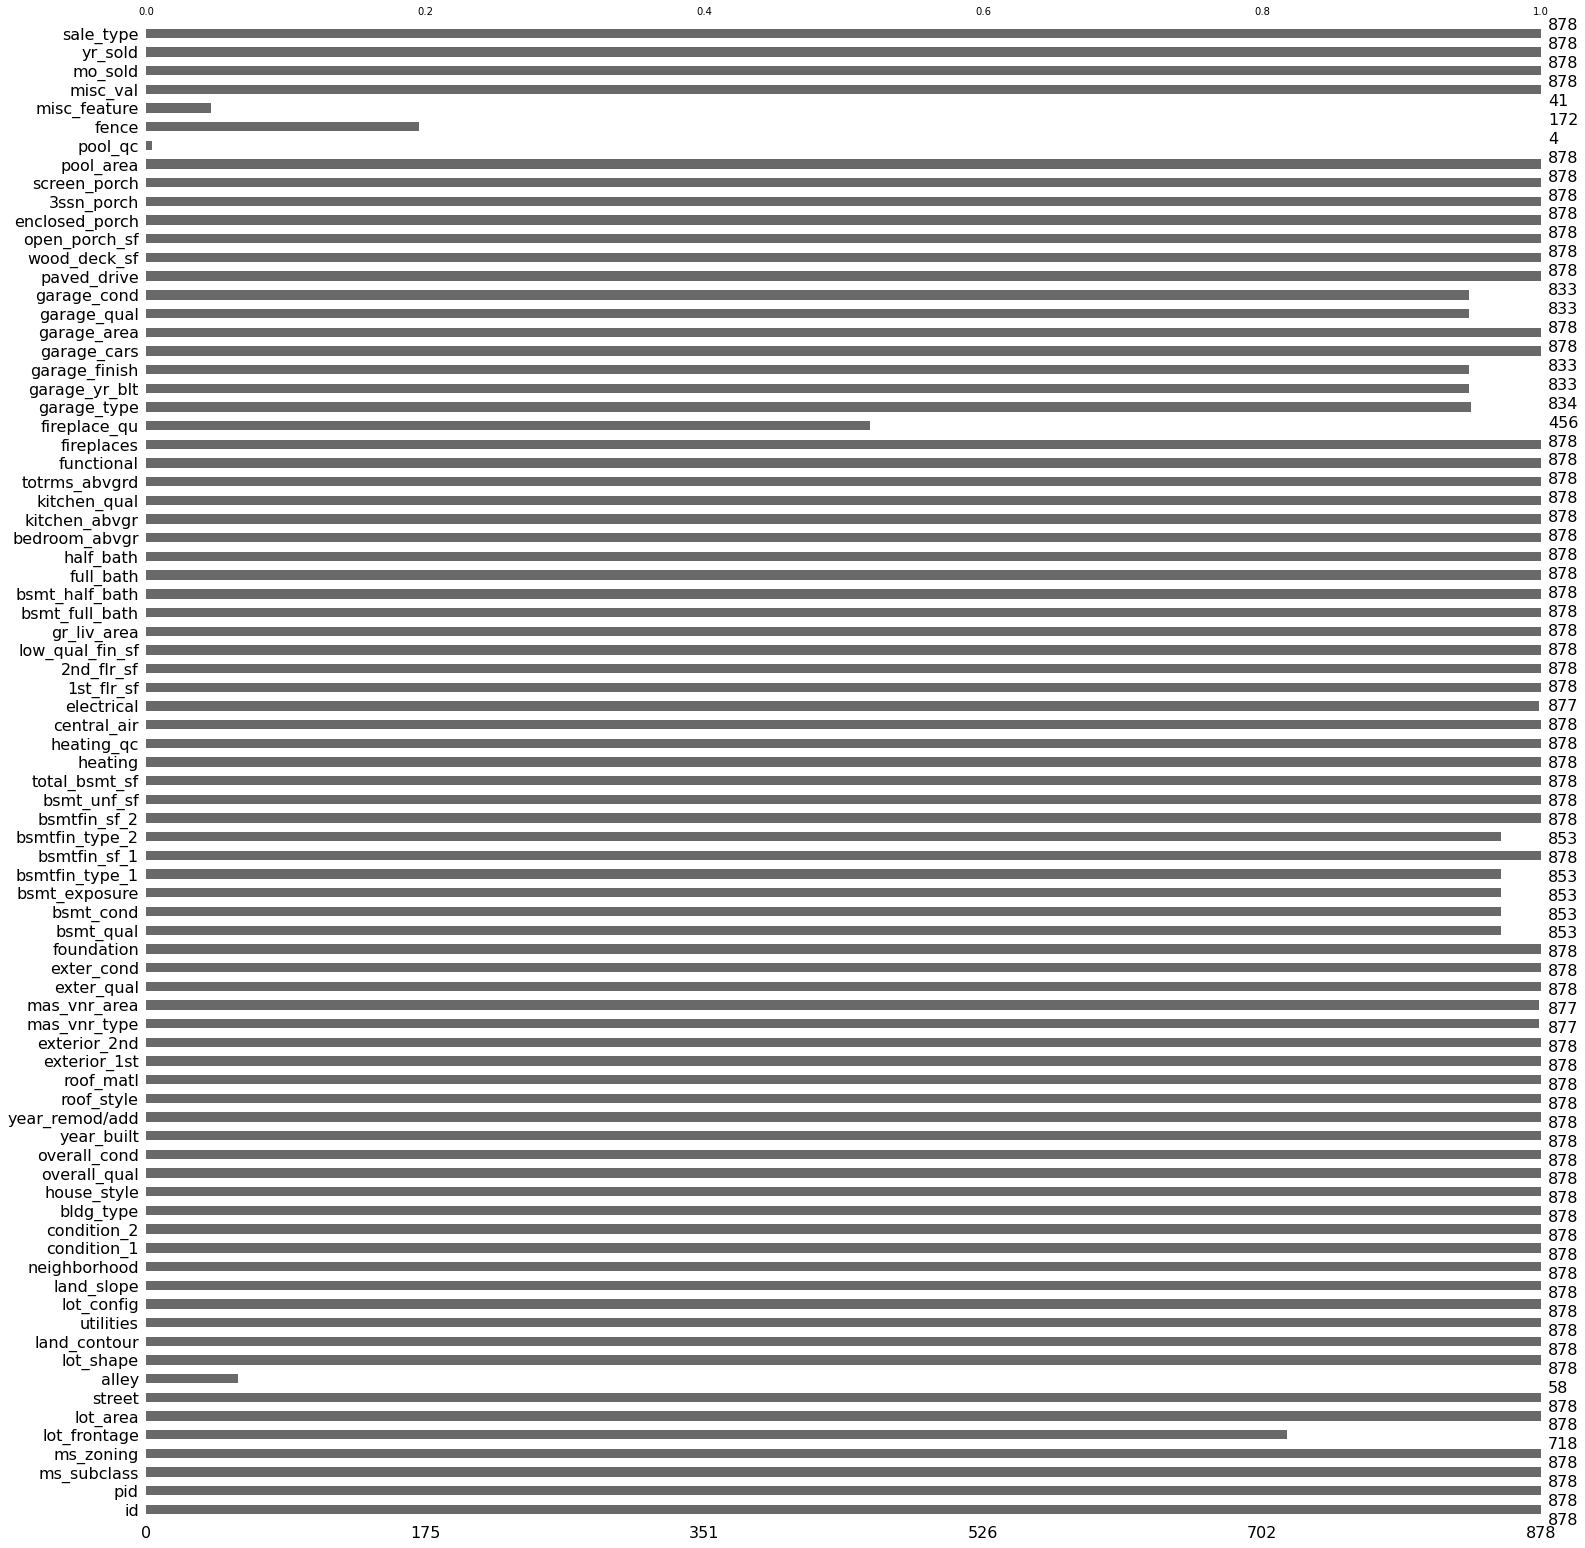

In [630]:
#check missing/Nan values in Dataset test.csv
msno.bar(ames_test);

In [631]:
# some of the following functions were adapted from https://medium.com/@kevin.a.crystal/intermediate-data-cleaning-195e1af3ccf9

In [632]:
#creates a variable for checking the total null values in each column and then sorting their values in descending order.
missingvals_train=ames_train.isna().sum().sort_values(ascending=False)
#specifies if the amount of missing values is greater than or equal to 1
missingvals_train[missingvals_train>=1]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
dtype: int64

In [633]:
#creates a variable for checking the total null values in each column and then sorting their values in descending order.
missingvals_test=ames_test.isna().sum().sort_values(ascending=False)
#specifies if the amount of missing values is greater than or equal to 1
missingvals_test[missingvals_test>=1]

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
dtype: int64

In [634]:
#made a function of my own to print out the categorical columns and their unique values to see if there are patterns
def uniqueprinter (ames_train,categorical):
    for column in categorical:
        print(ames_train[column].unique())
        

In [635]:
categorical=['pool_qc',"misc_feature","fence","fireplace_qu",'garage_finish','garage_qual','garage_cond','bsmt_exposure','bsmtfin_type_2','bsmt_cond','bsmt_qual','bsmtfin_type_1','mas_vnr_type',"kitchen_qual","exter_qual","exter_cond",'ms_zoning','street','alley', 'land_contour','lot_config','condition_1','condition_2','bldg_type','house_style',"roof_style",'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','bsmtfin_type_2',"heating","heating_qc","central_air",'electrical','functional','misc_feature','sale_type']

In [636]:
#8 columns that print out have ['nan','Fa','Gd','Ex','TA']
#better to make the ordinal data a usable scale
uniqueprinter(ames_train,categorical)


[nan 'Fa' 'Gd' 'Ex' 'TA']
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
['No' 'Gd' 'Av' nan 'Mn']
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
['BrkFace' 'None' nan 'Stone' 'BrkCmn']
['Gd' 'TA' 'Fa' 'Ex']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Ex' 'Po']
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
['Pave' 'Grvl']
[nan 'Pave' 'Grvl']
['Lvl' 'HLS' 'Bnk' 'Low']
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Memb

In [637]:
#the following functions were adapted from https://medium.com/@kevin.a.crystal/intermediate-data-cleaning-195e1af3ccf9

In [638]:
#for ames_train
ordinal1to5=['pool_qc',"fireplace_qu",'garage_qual','garage_cond','bsmt_cond','bsmt_qual',"kitchen_qual","exter_qual","exter_cond"]
def numerizer_train(ames_train,ordinal1to5):
    for column in ordinal1to5:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())

ordlot_shape=['lot_shape']
def numerizer_lot(ames_train, ordlot_shape): 
    for column in ordlot_shape:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
utl=['utilities']
def numerizer_utl(ames_train,utl):
    for column in utl:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
lslope=['land_slope']
def numerizer_land_slope(ames_train,lslope):
    for column in lslope:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Gtl':3,'Mod':2,'Sev':1,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
expos=['bsmt_exposure']  
def numerizer_bsmt_ex(ames_train,expos):
    for column in expos:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({ 'Av': 3,'Mn': 2,'No': 1,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
bsmt1=['bsmtfin_type_1']
def numerizer_bsmt(ames_train,bsmt1):
    for column in bsmt1:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({ 'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
grg=["garage_finish"]
def numerizer_grg(ames_train,grg):
    for column in grg:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Fin': 3,'RFn': 2,'Unf':1,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
drvwy=["paved_drive"]
def numerizer_drvwy(ames_train,drvwy):
    for column in drvwy:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Y': 2, 'P' : 1, 'N' : 0,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())        
fence=["fence"]
def numerizer_fence(ames_train,fence):
    for column in fence:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1 })
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
grg=["garage_finish"]
def numerizer_grg(ames_train,grg):
    for column in grg:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Fin': 3,'RFn': 2,'Unf':1,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
drvwy=["paved_drive"]
def numerizer_drvwy(ames_train,drvwy):
    for column in drvwy:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'Y': 2, 'P' : 1, 'N' : 0,})
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())        
fence=["fence"]
def numerizer_fence(ames_train,fence):
    for column in fence:
        #makes the ordinal values into numeric values
        ames_train[column]= ames_train[column].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1 })
        #switches the columns from objects to numerics
        ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        print(ames_train[column].value_counts())
#ngbrhd=["neighborhood"]        
#def numerizer_ngbrhd_train(ames_train,ngbrhd):
    #for column in ngbrhd:
        #makes the ordinal values into numeric values
        #ames_train[column]= ames_train[column].map({'Sawyer':1, 'SawyerW':2, 'NAmes':3, 'Timber':4, 'Edwards':5, 'OldTown':6,
       #'BrDale':7, 'CollgCr':8, 'Somerst':9, 'Mitchel':10, 'StoneBr':11, 'NridgHt':12,
       #'Gilbert':13, 'Crawfor':14, 'IDOTRR':15, 'NWAmes':16, 'Veenker':17, 'MeadowV':18,
       #'SWISU':19, 'NoRidge':20, 'ClearCr':21, 'Blmngtn':22, 'BrkSide':23, 'NPkVill':24,
       #'Blueste':25, 'GrnHill':26, 'Greens':27, 'Landmrk':28})
        #switches the columns from objects to numerics
        #ames_train[column]= pd.to_numeric(ames_train[column])
        #replace the NaNs that are not accounted for in these columns
        #ames_train[column]=ames_train[column].fillna(0)
        #only for checking output
        #print(ames_train[column].value_counts())
#ohe = OneHotEncoder(sparse=False, drop='if_binary', handle_unknown='ignore')
#smart_encoder = make_column_transformer(
    #(ohe, ["misc_feature","fence",'garage_finish','garage_cond','bsmt_exposure','bsmtfin_type_2','bsmtfin_type_1','mas_vnr_type','ms_zoning','street','alley', 'land_contour','lot_config','condition_1','condition_2','bldg_type','house_style',"roof_style",'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','bsmtfin_type_2',"heating","heating_qc","central_air",'electrical','functional','misc_feature','sale_type']), # These are all of the categorical features
    #remainder='passthrough',
    #verbose_feature_names_out=False
#)

#ames_train = smart_encoder.fit_transform(ames_train)
#ames_test = smart_encoder.transform(ames_test)

In [639]:
#for ames_test
ordinal1to5=['pool_qc',"fireplace_qu",'garage_qual','garage_cond','bsmt_cond','bsmt_qual',"kitchen_qual","exter_qual","exter_cond"]
def numerizer_train_test(ames_test,ordinal1to5):
    for column in ordinal1to5:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
ordlot_shape=['lot_shape']
def numerizer_lot_test(ames_test,ordlot_shape):
    for column in ordlot_shape:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({ 'Reg':4,'IR1':3,'IR2':2,'IR3':1,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
utl=['utilities']
def numerizer_utl_test(ames_test,utl):
    for column in utl:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
lslope=['land_slope']
def numerizer_land_slope_test(ames_test,lslope):
    for column in lslope:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'Gtl':3,'Mod':2,'Sev':1,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
expos=['bsmt_exposure']  
def numerizer_bsmt_ex_test(ames_test,expos):
    for column in expos:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({ 'Av': 3,'Mn': 2,'No': 1,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
bsmt1=['bsmtfin_type_1']
def numerizer_bsmt_test(ames_test,bsmt1):
    for column in bsmt1:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({ 'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
grg=["garage_finish"]
def numerizer_grg_test(ames_test,grg):
    for column in grg:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'Fin': 3,'RFn': 2,'Unf':1,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
drvwy=["paved_drive"]
def numerizer_drvwy_test(ames_test,drvwy):
    for column in drvwy:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'Y': 2, 'P' : 1, 'N' : 0,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())        
fence=["fence"]
def numerizer_fence_test(ames_test,fence):
    for column in fence:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1 })
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
grg=["garage_finish"]
def numerizer_grg_test(ames_test,grg):
    for column in grg:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'Fin': 3,'RFn': 2,'Unf':1,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
drvwy=["paved_drive"]
def numerizer_drvwy_test(ames_test,drvwy):
    for column in drvwy:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'Y': 2, 'P' : 1, 'N' : 0,})
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())        
fence=["fence"]
def numerizer_fence_test(ames_test,fence):
    for column in fence:
        #makes the ordinal values into numeric values
        ames_test[column]= ames_test[column].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1 })
        #switches the columns from objects to numerics
        ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        print(ames_test[column].value_counts())
#ngbrhd=["neighborhood"]        
#def numerizer_ngbrhd_test(ames_test,ngbrhd):
    #for column in ngbrhd:
        #makes the ordinal values into numeric values
        #ames_test[column]= ames_test[column].map({'Sawyer':1, 'SawyerW':2, 'NAmes':3, 'Timber':4, 'Edwards':5, 'OldTown':6,
       #'BrDale':7, 'CollgCr':8, 'Somerst':9, 'Mitchel':10, 'StoneBr':11, 'NridgHt':12,
       #'Gilbert':13, 'Crawfor':14, 'IDOTRR':15, 'NWAmes':16, 'Veenker':17, 'MeadowV':18,
       #'SWISU':19, 'NoRidge':20, 'ClearCr':21, 'Blmngtn':22, 'BrkSide':23, 'NPkVill':24,
       #'Blueste':25, 'GrnHill':26, 'Greens':27, 'Landmrk':28})
        #switches the columns from objects to numerics
        #ames_test[column]= pd.to_numeric(ames_test[column])
        #replace the NaNs that are not accounted for in these columns
        #ames_test[column]=ames_test[column].fillna(0)
        #only for checking output
        #print(ames_test[column].value_counts())        
        
        
       

In [640]:
#applies functions to each ordinal column in both ames_train, and ames_test
numerizer_train(ames_train,ordinal1to5)
numerizer_train_test(ames_test,ordinal1to5)
numerizer_lot(ames_train,ordlot_shape)
numerizer_lot_test(ames_test,ordlot_shape)
numerizer_utl(ames_train,utl)
numerizer_utl_test(ames_test,utl)
numerizer_land_slope(ames_train,lslope)
numerizer_land_slope_test(ames_test,lslope)
numerizer_bsmt_ex(ames_train,expos)
numerizer_bsmt_ex_test(ames_test,expos)
numerizer_grg(ames_train,grg)
numerizer_grg_test(ames_test,grg)
numerizer_bsmt(ames_train,bsmt1)
numerizer_bsmt_test(ames_test,bsmt1)
numerizer_drvwy(ames_train,drvwy)
numerizer_drvwy_test(ames_test,drvwy)
numerizer_fence(ames_train,fence)
numerizer_fence_test(ames_test,fence)
numerizer_ngbrhd_train(ames_train,ngbrhd)
numerizer_ngbrhd_test(ames_test,ngbrhd)

0.0    2042
4.0       4
2.0       2
3.0       2
5.0       1
Name: pool_qc, dtype: int64
0.0    1000
4.0     523
3.0     407
2.0      59
5.0      31
1.0      31
Name: fireplace_qu, dtype: int64
3.0    1832
0.0     114
2.0      82
4.0      18
5.0       3
1.0       2
Name: garage_qual, dtype: int64
3.0    1868
0.0     114
2.0      47
4.0      12
1.0       8
5.0       2
Name: garage_cond, dtype: int64
3.0    1834
4.0      89
2.0      65
0.0      55
1.0       5
5.0       3
Name: bsmt_cond, dtype: int64
3.0    887
4.0    864
5.0    184
2.0     60
0.0     55
1.0      1
Name: bsmt_qual, dtype: int64
3    1047
4     806
5     151
2      47
Name: kitchen_qual, dtype: int64
3    1247
4     697
5      81
2      26
Name: exter_qual, dtype: int64
3    1778
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64
0.0    874
5.0      3
3.0      1
Name: pool_qc, dtype: int64
0.0    422
4.0    220
3.0    193
2.0     16
1.0     15
5.0     12
Name: fireplace_qu, dtype: int64
3.0    782
0.0  

In [641]:
ames_train["neighborhood"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

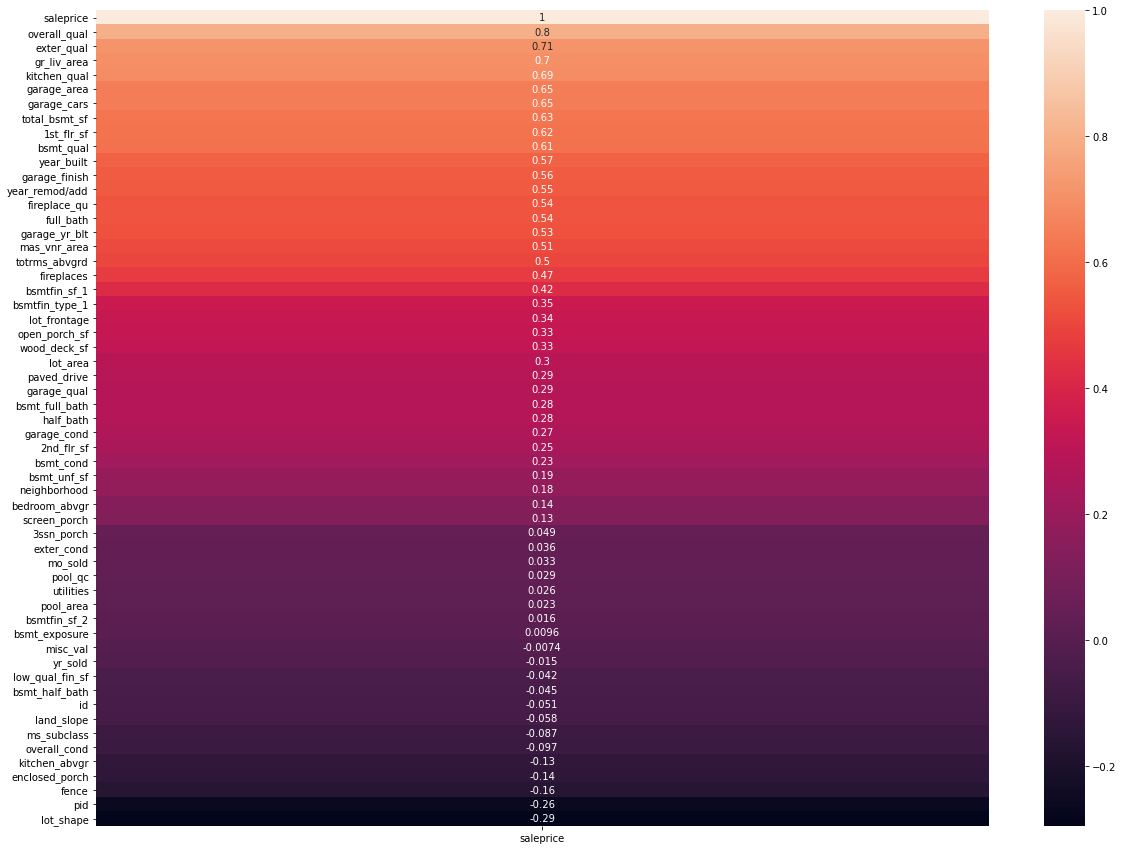

In [642]:
#check what variables correlate with Sale price in ames_train after cleaning some of the columns
plt.figure(figsize=(20,15))
sns.heatmap(ames_train.corr()[['saleprice']].sort_values(by="saleprice",ascending=False), annot=True);

In [643]:
#dropping colums with correlation less than .10
ames_train=ames_train.drop(columns=["3ssn_porch","exter_cond",'mo_sold','pool_qc',"utilities","pool_area","bsmtfin_sf_2","bsmt_exposure","misc_val","yr_sold","low_qual_fin_sf","bsmt_half_bath","land_slope","ms_subclass","overall_cond"])
ames_test=ames_test.drop(columns=["3ssn_porch","exter_cond",'mo_sold','pool_qc',"utilities","pool_area","bsmtfin_sf_2","bsmt_exposure","misc_val","yr_sold","low_qual_fin_sf","bsmt_half_bath","land_slope","ms_subclass","overall_cond"])

In [644]:
#missing data values have been dealt with, ordinal sets have been quantified going to export both train and test csv's

In [645]:
#creates a variable for checking the total null values in each column and then sorting their values in descending order.
missingvals_train=ames_train.isna().sum().sort_values(ascending=False)
#specifies if the amount of missing values is greater than or equal to 1
missingvals_train[missingvals_train>=1]

misc_feature      1986
alley             1911
lot_frontage       330
garage_yr_blt      114
garage_type        113
bsmtfin_type_2      56
mas_vnr_type        22
mas_vnr_area        22
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_1         1
garage_area          1
garage_cars          1
dtype: int64

In [646]:
ames_train=ames_train.fillna(0)

In [647]:
ames_test=ames_test.fillna(0)

In [648]:
ames_train.info()  #['ms_zoning','street','alley', 'land_contour','lot_config','condition_1','condition_2','bldg_type','house_style',"roof_style",'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','bsmt_type_2',"heating","heating_qc","central_air",'electrical','functional','misc_feature','sale_type']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2051 non-null   int64  
 1   pid             2051 non-null   int64  
 2   ms_zoning       2051 non-null   object 
 3   lot_frontage    2051 non-null   float64
 4   lot_area        2051 non-null   int64  
 5   street          2051 non-null   object 
 6   alley           2051 non-null   object 
 7   lot_shape       2051 non-null   int64  
 8   land_contour    2051 non-null   object 
 9   lot_config      2051 non-null   object 
 10  neighborhood    2051 non-null   int64  
 11  condition_1     2051 non-null   object 
 12  condition_2     2051 non-null   object 
 13  bldg_type       2051 non-null   object 
 14  house_style     2051 non-null   object 
 15  overall_qual    2051 non-null   int64  
 16  year_built      2051 non-null   int64  
 17  year_remod/add  2051 non-null   i

In [649]:
ames_test = ames_test.drop(columns=['ms_zoning','street','alley', 'land_contour','lot_config','condition_1','condition_2','bldg_type','house_style',"roof_style",'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','bsmtfin_type_2',"heating","heating_qc","central_air",'electrical','functional','garage_type','misc_feature','sale_type'])

In [650]:
#add dummies to rest objects of data set for evaluation and eda use
ames_train = ames_train.drop(columns=['ms_zoning','street','alley', 'land_contour','lot_config','condition_1','condition_2','bldg_type','house_style',"roof_style",'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','bsmtfin_type_2',"heating","heating_qc","central_air",'electrical','functional','garage_type','misc_feature','sale_type'])

In [651]:
ames_train.head()

,id,pid,lot_frontage,lot_area,lot_shape,neighborhood,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,fence,saleprice
0,109,533352170,0.0,13517,3,1,6,1976,2005,289.0,4,3.0,3.0,6.0,533.0,192.0,725.0,725,754,1479,0.0,2,1,3,1,4,6,0,0.0,1976.0,2.0,2.0,475.0,3.0,3.0,2,0,44,0,0,0.0,130500
1,544,531379050,43.0,11492,3,2,7,1996,1997,132.0,4,4.0,3.0,6.0,637.0,276.0,913.0,913,1209,2122,1.0,2,1,4,1,4,8,1,3.0,1997.0,2.0,2.0,559.0,3.0,3.0,2,0,74,0,0,0.0,220000
2,153,535304180,68.0,7922,4,3,5,1953,2007,0.0,3,3.0,3.0,6.0,731.0,326.0,1057.0,1057,0,1057,1.0,1,0,3,1,4,5,0,0.0,1953.0,1.0,1.0,246.0,3.0,3.0,2,0,52,0,0,0.0,109000
3,318,916386060,73.0,9802,4,4,5,2006,2007,0.0,3,4.0,3.0,1.0,0.0,384.0,384.0,744,700,1444,0.0,2,1,3,1,3,7,0,0.0,2007.0,3.0,2.0,400.0,3.0,3.0,2,100,0,0,0,0.0,174000
4,255,906425045,82.0,14235,3,2,6,1900,1993,0.0,3,2.0,4.0,1.0,0.0,676.0,676.0,831,614,1445,0.0,2,0,3,1,3,6,0,0.0,1957.0,1.0,2.0,484.0,3.0,3.0,0,0,59,0,0,0.0,138500


In [652]:
#creates a variable for checking the total null values in each column and then sorting their values in descending order.
missingvals_test=ames_test.isna().sum().sort_values(ascending=False)
#specifies if the amount of missing values is greater than or equal to 1
missingvals_test[missingvals_test>=1]

Series([], dtype: int64)

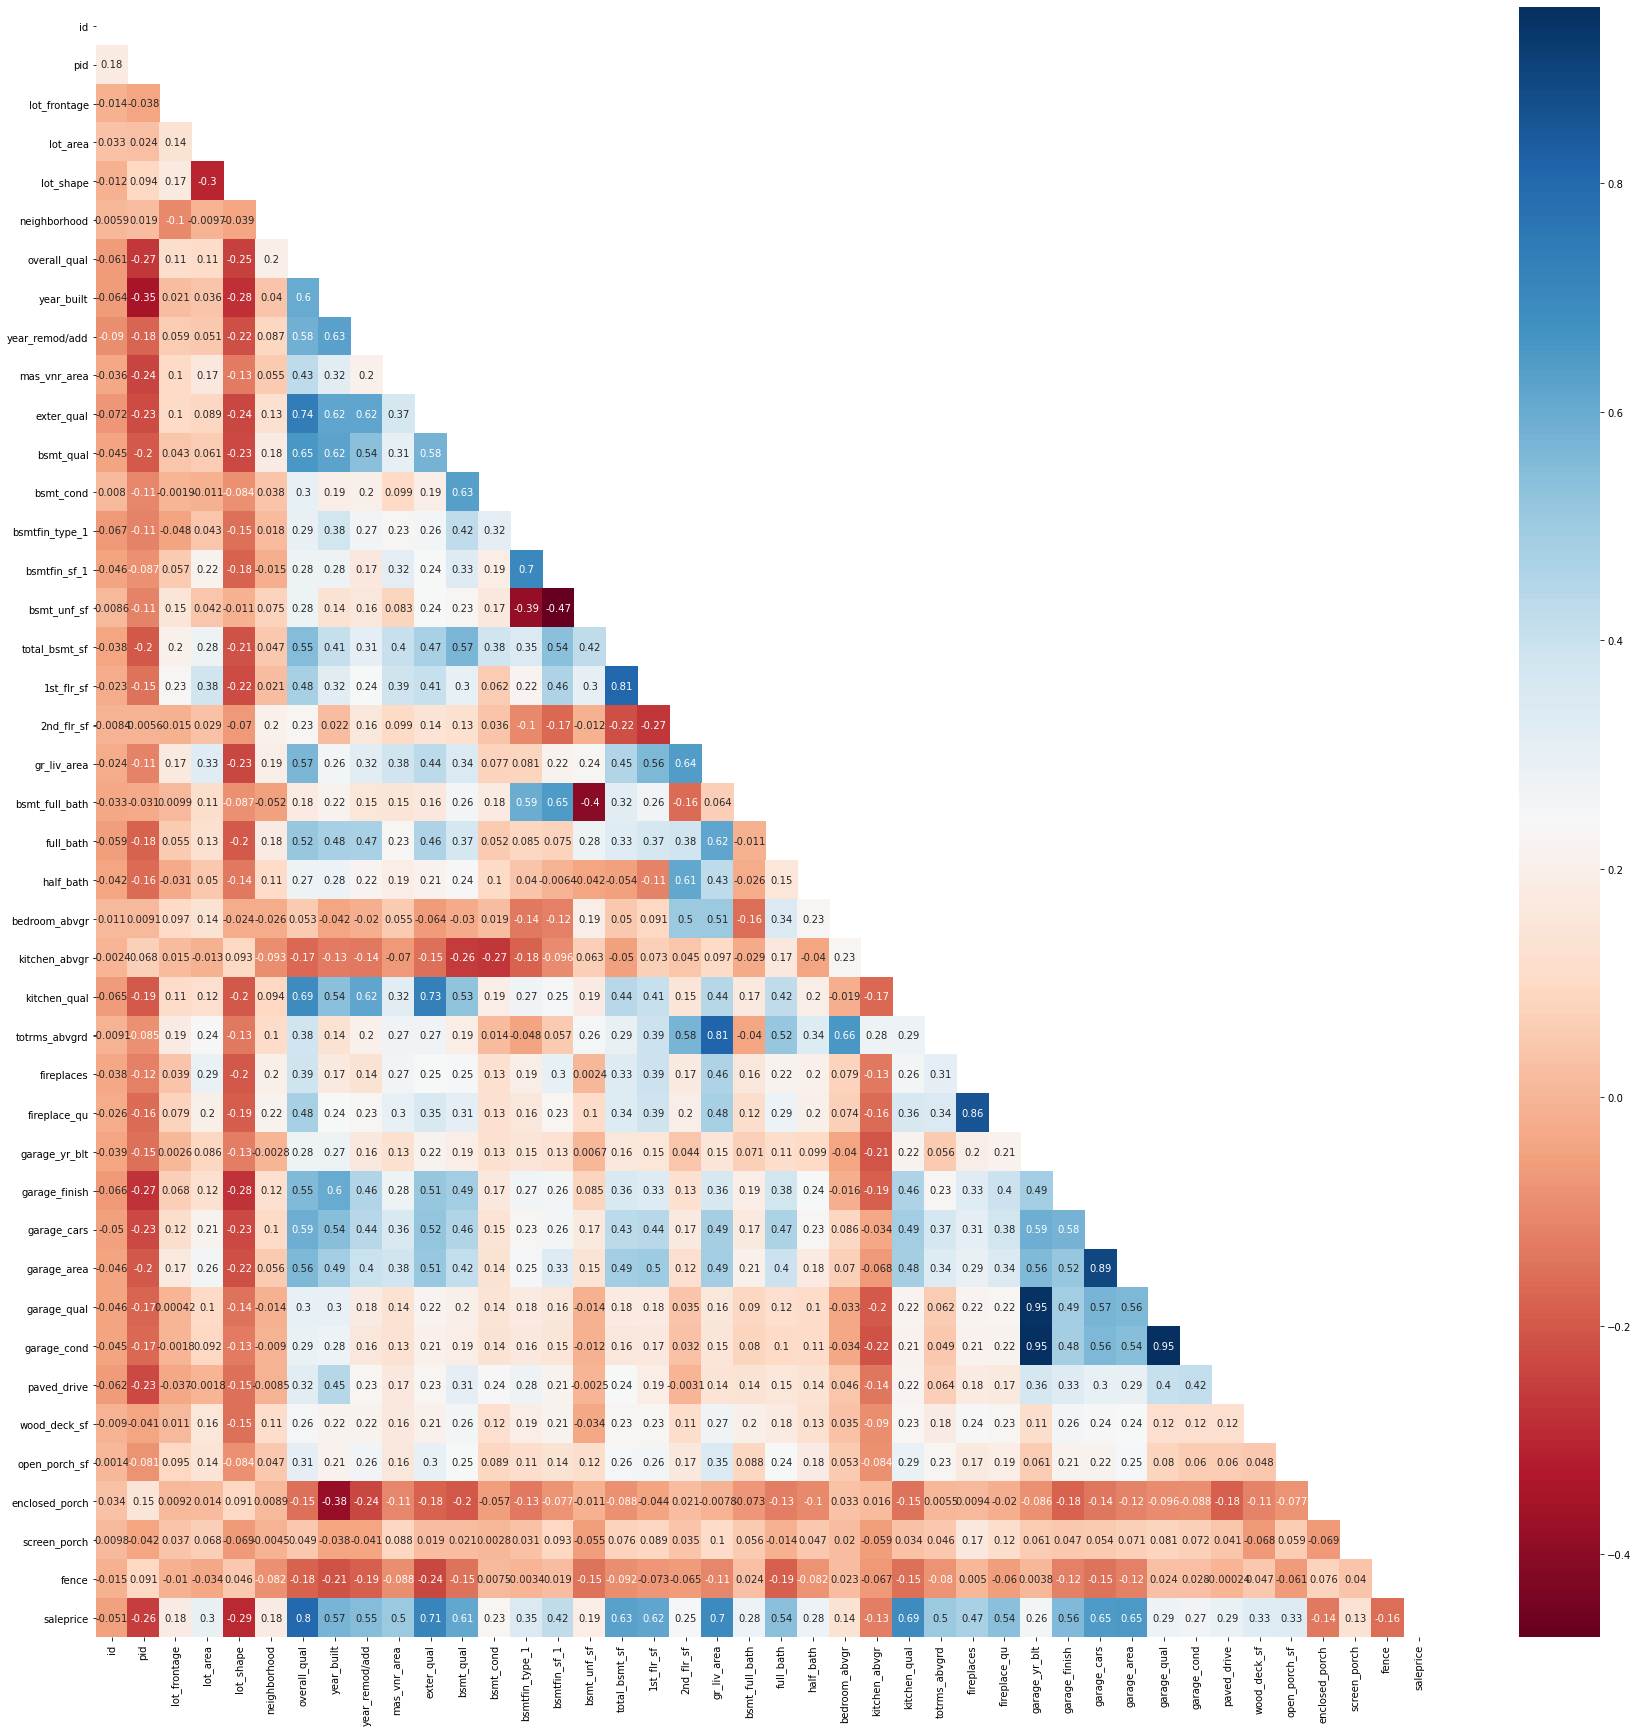

In [653]:
#Check for multicollinearity between features
ames_train.drop(columns="saleprice")
mask = np.zeros_like(ames_train.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(ames_train.corr(), annot=True, cmap="RdBu", mask=mask);

In [654]:
#dropping lines with multicolinearity above
#ames_train=ames_train.drop(columns=["garage_area","garage_yr_blt","garage_cond","fireplaces",'totrms_abvgrd'])

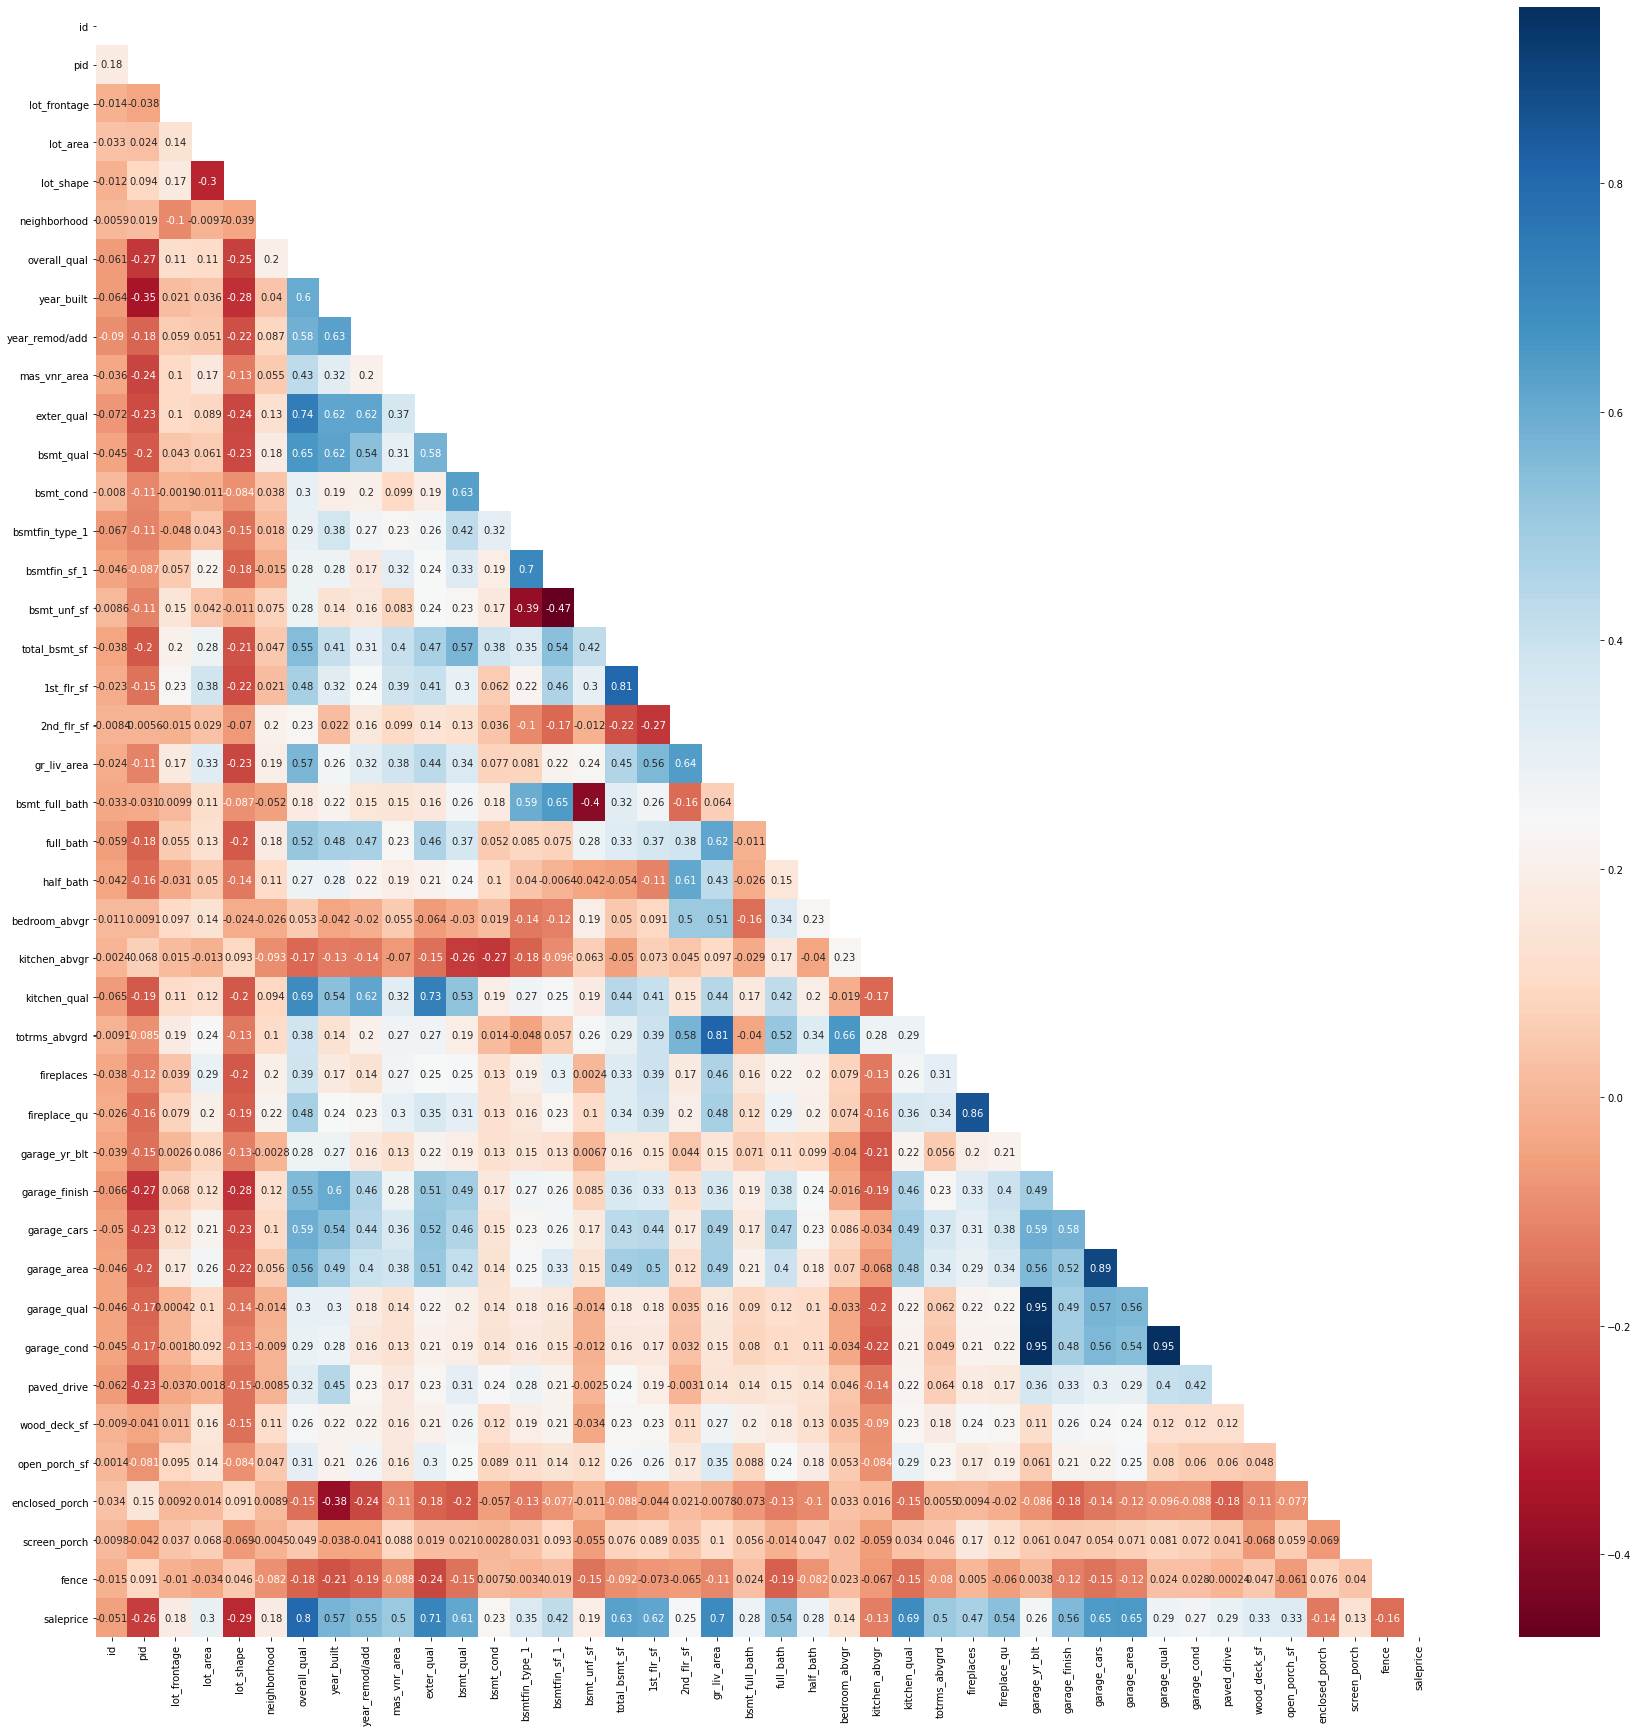

In [655]:
#Check for multicollinearity between features
ames_train.drop(columns="saleprice")
mask = np.zeros_like(ames_train.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(ames_train.corr(), annot=True, cmap="RdBu", mask=mask);

In [656]:
#save and export to csv
ames_train.to_csv('../datasets/clean_ames_train.csv', index=False)
ames_test.to_csv('../datasets/clean_ames_test.csv',index=False)

In [657]:
ames_train.shape

(2051, 42)

In [658]:
ames_test.shape

(878, 41)

In [659]:
ames_test.isnull().sum().sum()

0

In [660]:
ames_train.isnull().sum().sum()

0